In [53]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [47]:
df = pd.DataFrame(pd.read_csv("03_train_tokenizers_stats.csv", sep=",", skiprows=0))
df = df.drop('start_time', axis=1)
df = df.drop('end_time', axis=1)
df["duration"] = df["duration"].apply(lambda x: int(str(x).split(":")[0])*60+int(str(x).split(":")[1])+1)
df["tokenizer_lines"] = df["tokenizer_lines"].apply(lambda x: int(int(x)/100000))
df

,tokenizer_lines,duration
0,1,1
1,2,2
2,3,3
3,4,4
4,5,5
5,6,7
6,7,8
7,8,9
8,9,11
9,10,12


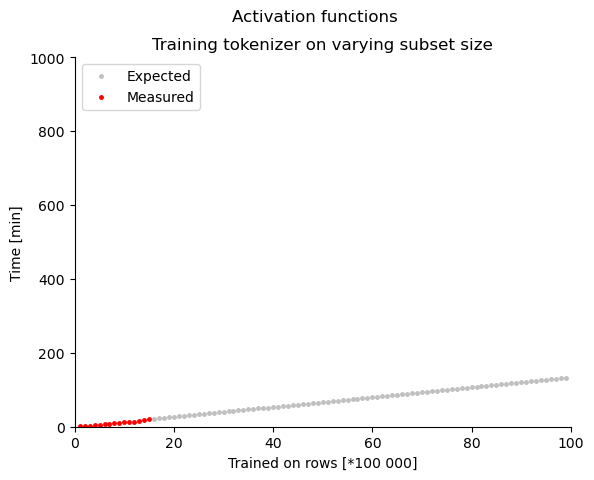

In [67]:
m = 20/15
pointbag_x = range(16, 100)
pointbag_y = []
for x in pointbag_x:
    pointbag_y.append(x*m)
plt.plot(pointbag_x, pointbag_y, label = "Expected",linewidth=1.0, color="silver", linestyle="", marker="o", markersize=2.5)
plt.plot(df["tokenizer_lines"], df["duration"],linestyle="",marker="o", markersize=2.5, label="Measured", color="red")
plt.ylim(0, 1000)
plt.xlim(0,100)
plt.legend()
plt.gca().spines['right'].set_color('none')
plt.gca().spines['top'].set_color('none')
plt.title("Training tokenizer on varying subset size")
plt.suptitle('Activation functions')
plt.xlabel("Trained on rows [*100 000]")
plt.ylabel("Time [min]")
plt.legend(loc="upper left")
plt.savefig('plot_tokenizer_ram.png', dpi=250)
plt.show()
plt.close()
